In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'], axis = 1).astype("float64")
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [3]:
rf_model = RandomForestRegressor(random_state = 44)

In [4]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=44)

In [ ]:
#TAHMİN

In [6]:
y_pred = rf_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test, y_pred))

339.9681148738477

In [8]:
#TUNING

In [11]:
rf_params = {'max_depth' : list(range(1,10)),
             'max_features' : [3,5,10,15],
             'n_estimators' : [100,200,500,1000,2000]}

In [12]:
rf_model = RandomForestRegressor(random_state = 44)

In [13]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1)#çok fazla kombinasyon olduğundan işlemi kısa sürdürürüz n_jobs paralele işlemle yapar

In [14]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=44), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [15]:
rf_cv_model.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 500}

In [16]:
rf_tuned = RandomForestRegressor(max_depth = 6, max_features = 3, n_estimators = 500, random_state = 44)

In [17]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, max_features=3, n_estimators=500,
                      random_state=44)

In [18]:
y_pred = rf_tuned.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

346.3276482473597

In [20]:
#değişkenlerin önemlilik değerlerini hesaplayalım

In [26]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100},index = X_train.columns)

Text(0.5, 0, 'Değişken önem düzeyi')

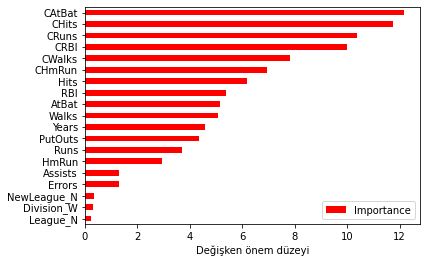

In [30]:
Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Değişken önem düzeyi')